In [1]:
#import packages
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
from scipy.integrate import odeint
from itertools import chain
import warnings
import sys
import os

In [2]:
# Functions needed
#ODE RHS for BDM model
def meanfield_RHS(u,t,xi):
    dudt = xi[0]*u*(1-u) - xi[1]*u
    return dudt

def simulate_meanfield_model(t, C0, xi):
    sol = odeint(meanfield_RHS, C0, t, args=(xi,))
    return sol

def flatten_chain(matrix):
    return list(chain.from_iterable(matrix))

0.01
1.01
2.01
3.01
4.01


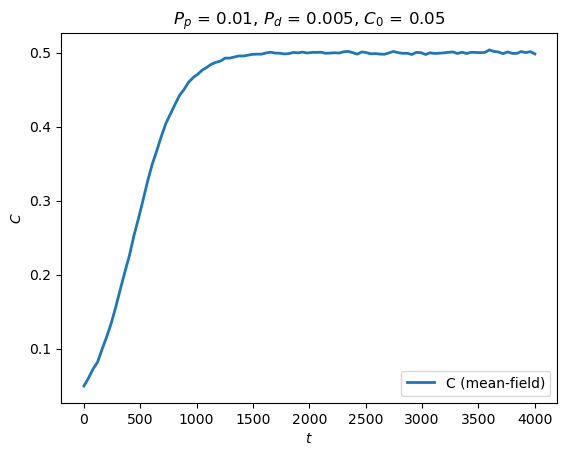

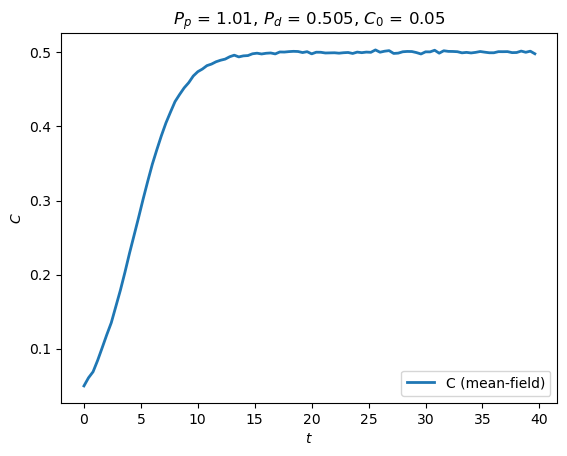

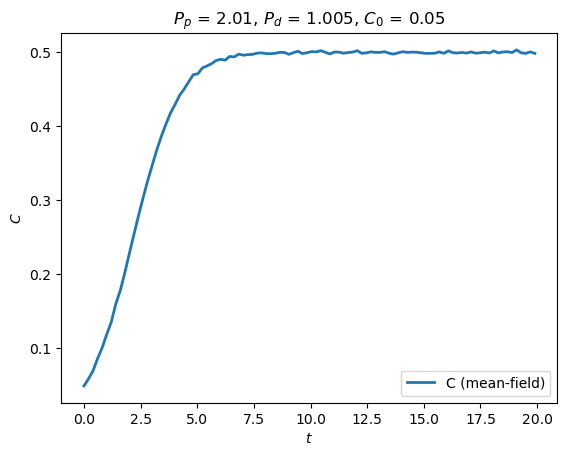

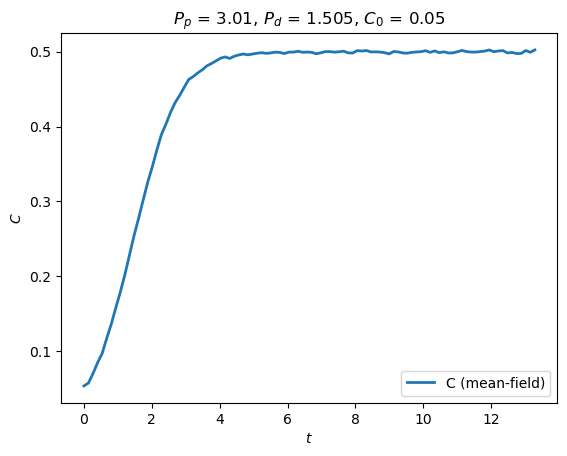

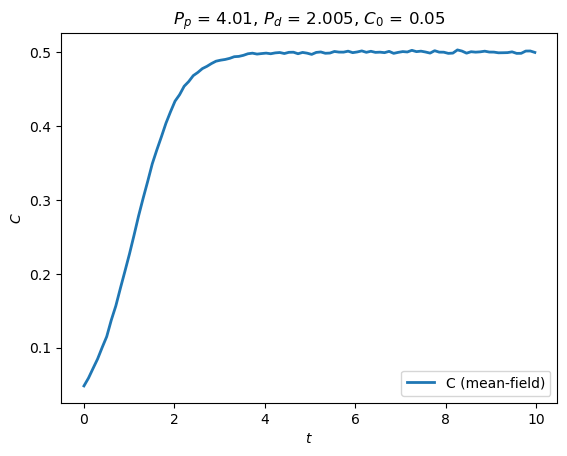

In [4]:
# Load the data with the following set of parameters
m  = 0.05     # initial condition
rm = 1        # migration parameter
rp_vect = np.linspace(0.01,4.01,5) # test
# rp_vect = np.linspace(0.01,5,500)
folder  = '../../data/Data_mean_field_lessnoise'

#  Loop over proliferation rates
for rp in rp_vect:
    rd = rp/2 # death
    if rp==int(rp):
        rp = int(rp)
    else: 
        rp = round(rp,2)
    
    if rp==int(rp):
        rp = int(rp)
    else: 
        rp = round(rp,2)
    
    rd = rp/2;
    if rd==int(rd):
        rd = int(rd)
    else: 
        rd = round(rd,3)

    # Parameters/set-up for forward solving the learned sindy models
    tf      = 20/(rp-rd)  # final time
    t_solve = np.linspace(0, tf, 100)
    t_solve_span = (t_solve[0], t_solve[-1])

    # Generate mean-field solution
    xi_mfld  = [rp,rd]
    sol_mfld = simulate_meanfield_model(t_solve,m,xi_mfld)
    u_mfld   = np.array(flatten_chain(sol_mfld))
    # no noise
    u_mfld_noisy = u_mfld + np.random.normal(0, 0.0025*np.mean(u_mfld), 100)

    fig, ax = plt.subplots(1, 1) #, tight_layout=True
    ax.plot(t_solve,u_mfld_noisy,label = 'C (mean-field)',linewidth=2)
    ax.legend(loc='best')
    ax.set_title("$P_p$ = " +str(rp)+", $P_d$ = " +str(rd)+", $C_0$ = " +str(m))
    ax.set_xlabel("$t$")
    ax.set_ylabel("$C$")

    pickle_filename = folder+'/gen_mfld_data_rp_'+str(rp)+'_rd_'+str(rd)+'_rm_'+str(rm)+'_m_'+str(m)+'.pkl'
    with open(pickle_filename, 'wb') as h:
        pickle.dump([t_solve,u_mfld_noisy],h,protocol=pickle.HIGHEST_PROTOCOL)

    npy_filename = folder+'/gen_mfld_data_rp_'+str(rp)+'_rd_'+str(rd)+'_rm_'+str(rm)+'_m_'+str(m)+'.npy'
    data = {"t_solve":t_solve,
        "u_mfld_noisy":u_mfld_noisy}
    np.save(npy_filename,data)

    print(rp)
